<!-- <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"> -->

## Practice: Visualisation with `matplotlib` and `seaborn`

---

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12

In [ ]:
FHRS_URL = 'https://opendata.camden.gov.uk/api/views/ggah-dkrr/rows.csv?accessType=DOWNLOAD'

Read in the Food Hygiene Rating Scheme data from `FHRS_URL` into a DataFrame called `fhrs`.

In [ ]:
fhrs = pd.read_csv(FHRS_URL)

Change the data type of `Rating Date` to `datetime`.

In [ ]:
fhrs['Rating Date'] = pd.to_datetime(fhrs['Rating Date'])

In [ ]:
fhrs['Rating Value'].value_counts()

5                      1426
4                       631
3                       522
1                       177
2                       162
Exempt                   89
AwaitingInspection       41
0                        30
AwaitingPublication       1
Name: Rating Value, dtype: int64

Filter `fhrs` to include only restaurants/cafés/canteens where the `Rating Value` is numeric and `New Rating Pending` is `False`.

In [ ]:
fhrs = fhrs[(fhrs['Business Type Description'] == 'Restaurant/Cafe/Canteen') &
            (~fhrs['Rating Value'].isin(['AwaitingPublication', 'Exempt', 'AwaitingInspection'])) &
            (~fhrs['New Rating Pending'])]

Change the data type of `Rating Value` to `int`.

In [ ]:
fhrs['Rating Value'] = fhrs['Rating Value'].astype('int64')

Produce a bar plot of `Rating Value`.

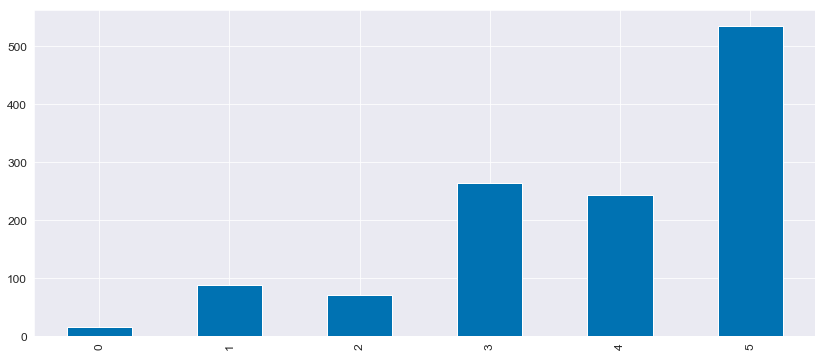

In [ ]:
fhrs['Rating Value'].value_counts().sort_index().plot.bar();

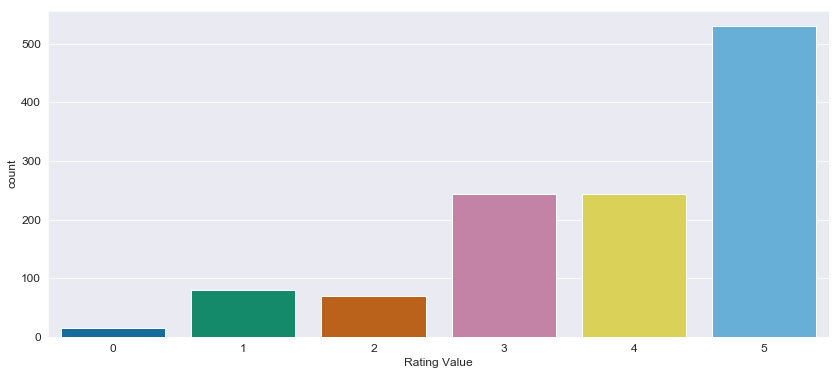

In [ ]:
sns.countplot(x='Rating Value', data=fhrs);

Create a new variable `Rating Year` from `Rating Date`.

In [ ]:
fhrs['Rating Year'] = fhrs['Rating Date'].dt.year

Produce a box plot of `Rating Value` grouped by `Rating Year`.

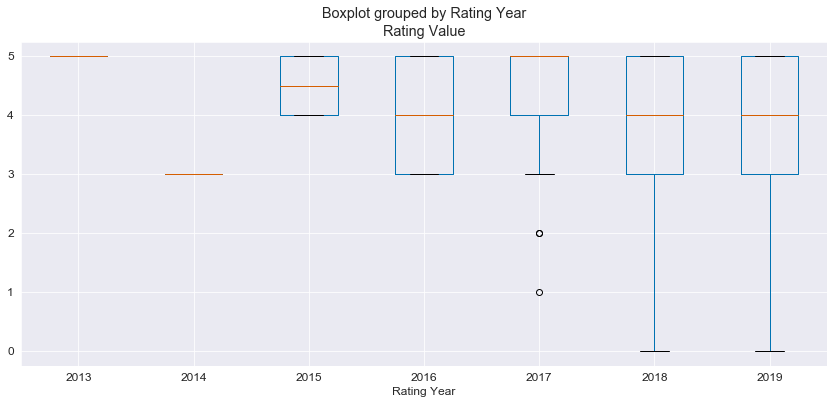

In [ ]:
fhrs.boxplot(column='Rating Value', by='Rating Year');

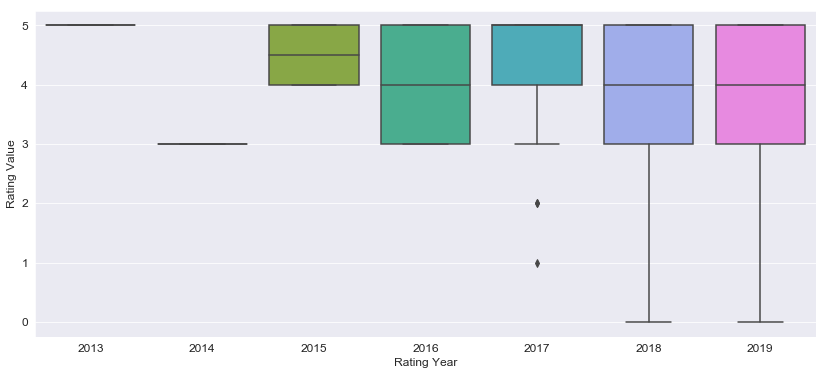

In [ ]:
sns.boxplot(x='Rating Year', y='Rating Value', data=fhrs);

Produce a scatter plot of `Hygiene Score`, `Structural Score`, `Confidence In Management Score`, and `Rating Value`.

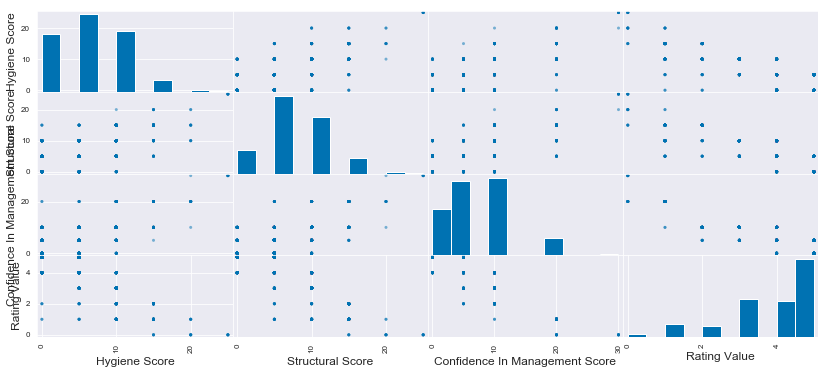

In [ ]:
scores = ['Hygiene Score', 'Structural Score', 'Confidence In Management Score', 'Rating Value']
pd.plotting.scatter_matrix(fhrs[scores]);

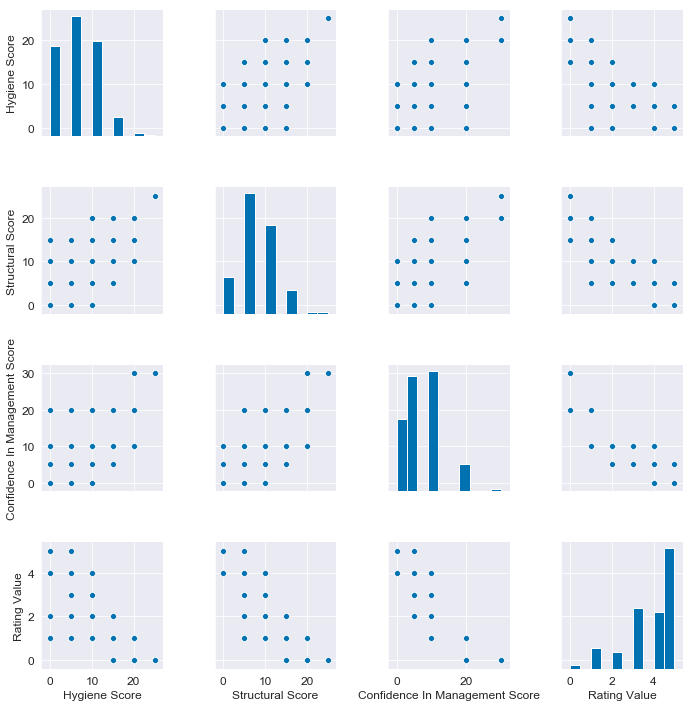

In [ ]:
sns.pairplot(fhrs[scores].dropna());

Using `seaborn`, produce a scatter plot of `Hygiene Score` against `Rating Value` including a linear regression line. Add some jitter to prevent overplotting (*clue: try the x_jitter and y_jitter params!*).

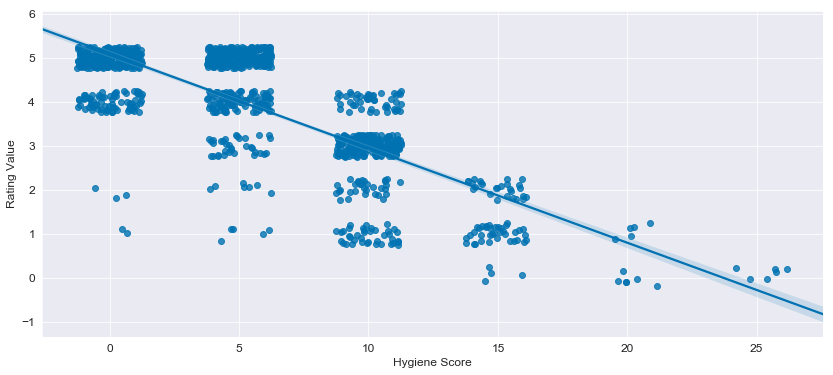

In [ ]:
sns.regplot(x='Hygiene Score', y='Rating Value', data=fhrs, x_jitter=1.25, y_jitter=0.25);